<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [3]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


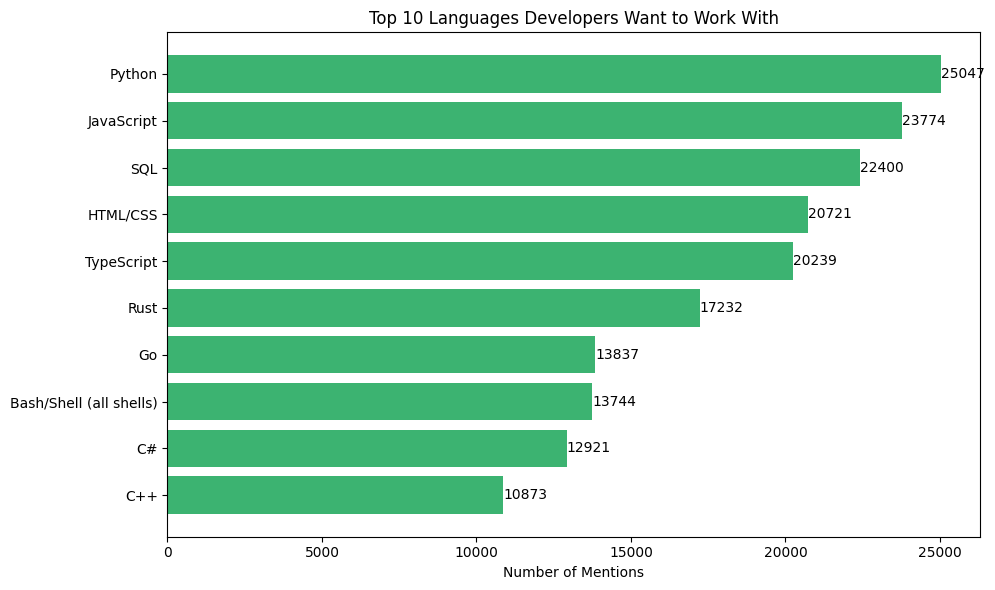

In [14]:
# Function to get top 10 languages from a column
def get_top_languages(column):
    all_langs = df[column].dropna().str.split(';').sum()
    return dict(Counter(all_langs).most_common(10))

# Get top 10 desired languages
top_want = get_top_languages('LanguageWantToWorkWith')

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
bars = plt.barh(list(top_want.keys()), list(top_want.values()), color='mediumseagreen')
plt.xlabel("Number of Mentions")
plt.title("Top 10 Languages Developers Want to Work With")
plt.gca().invert_yaxis()
plt.tight_layout()

# Add value labels to the bars
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             str(int(bar.get_width())),
             va='center', fontsize=10)

plt.show()

<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


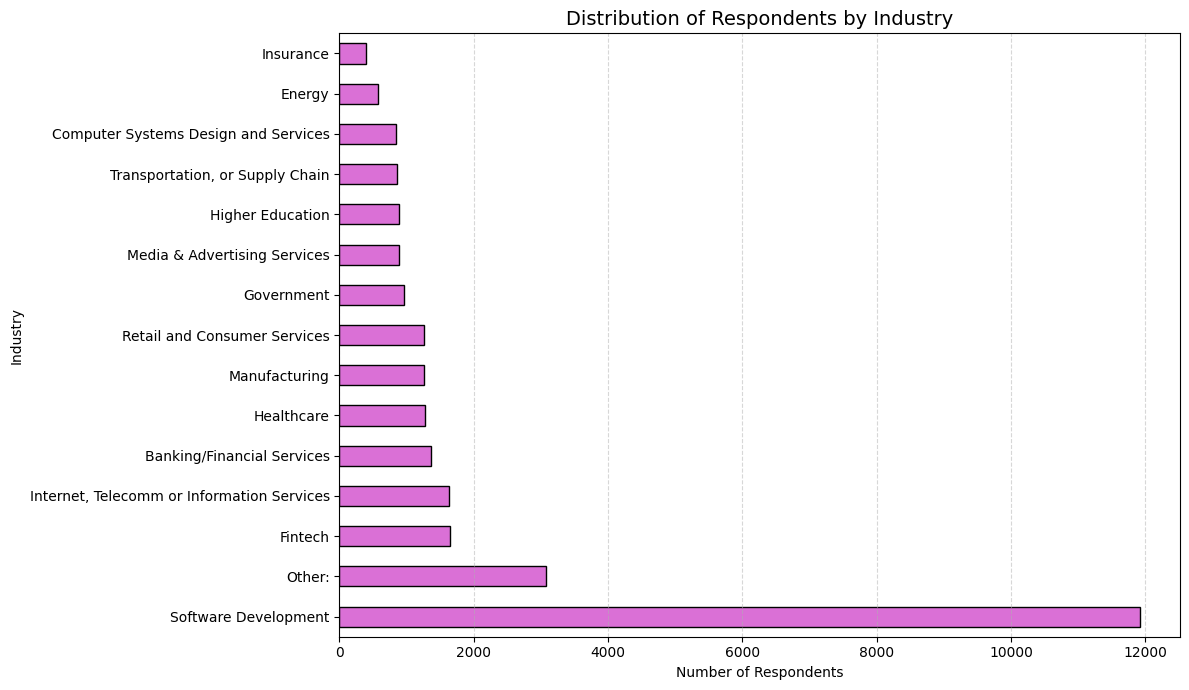

In [5]:
##Write your code here
#Drop missing values in 'Industry' and count occurrences
industry_counts = df['Industry'].dropna().value_counts()

# Plotting the bar chart
plt.figure(figsize=(12, 7))
industry_counts.plot(kind='barh', color='orchid', edgecolor='black')
plt.title('Distribution of Respondents by Industry', fontsize=14)
plt.xlabel('Number of Respondents')
plt.ylabel('Industry')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [12]:
##Write your code here
# Drop NaN values from compensation column
comp = df['ConvertedCompYearly'].dropna()

# Calculate basic statistics
mean_comp = comp.mean()
median_comp = comp.median()
std_comp = comp.std()

print(f"Mean Compensation: ${mean_comp:,.2f}")
print(f"Median Compensation: ${median_comp:,.2f}")
print(f"Standard Deviation: ${std_comp:,.2f}")

# Define threshold for outliers (3 standard deviations above the mean)
threshold = mean_comp + 3 * std_comp

# Filter outliers
high_outliers = comp[comp > threshold]

print(f"\nNumber of High Compensation Outliers: {len(high_outliers)}")
print(high_outliers.sort_values(ascending=False))

Mean Compensation: $86,155.29
Median Compensation: $65,000.00
Standard Deviation: $186,756.97

Number of High Compensation Outliers: 89
15837    16256603.0
12723    13818022.0
28379     9000000.0
17593     6340564.0
17672     4936778.0
            ...    
13336      660660.0
6735       650000.0
529        650000.0
28381      650000.0
28213      650000.0
Name: ConvertedCompYearly, Length: 89, dtype: float64


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [13]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Drop missing values from compensation column
comp = df['ConvertedCompYearly'].dropna()

# Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR
Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)
IQR = Q3 - Q1

# Determine lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: ${Q1:,.2f}")
print(f"Q3: ${Q3:,.2f}")
print(f"IQR: ${IQR:,.2f}")
print(f"Lower Bound: ${lower_bound:,.2f}")
print(f"Upper Bound: ${upper_bound:,.2f}")

Q1: $32,712.00
Q3: $107,971.50
IQR: $75,259.50
Lower Bound: $-80,177.25
Upper Bound: $220,860.75


In [14]:
# Filter outliers
outliers = comp[(comp < lower_bound) | (comp > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")

Number of Outliers: 978


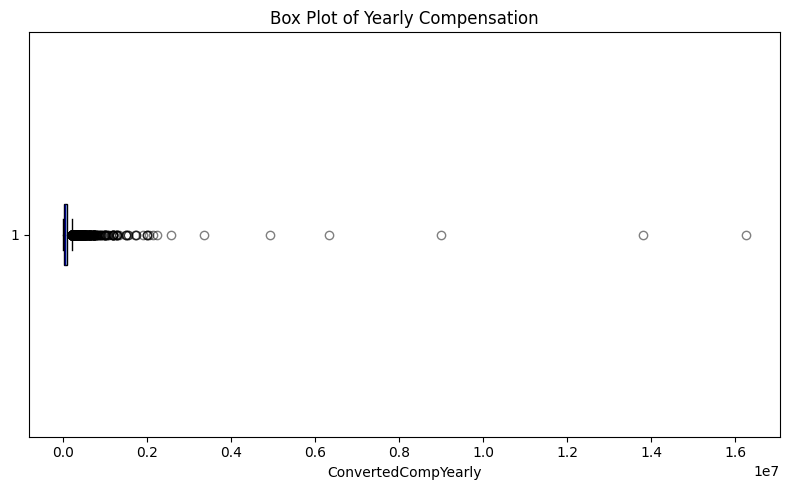

In [15]:
# Create box plot
plt.figure(figsize=(8, 5))
plt.boxplot(comp, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(marker='o', color='red', alpha=0.5),
            medianprops=dict(color='darkblue'))

plt.title('Box Plot of Yearly Compensation')
plt.xlabel('ConvertedCompYearly')
plt.tight_layout()
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [16]:
##Write your code here
# Drop missing values temporarily to calculate stats
comp = df['ConvertedCompYearly'].dropna()

# Compute IQR boundaries
Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows where compensation is within bounds or NaN
df_clean = df[(df['ConvertedCompYearly'].isna()) | 
              ((df['ConvertedCompYearly'] >= lower_bound) & 
               (df['ConvertedCompYearly'] <= upper_bound))]

# Validate the new DataFrame size
original_size = df.shape[0]
clean_size = df_clean.shape[0]

print(f"Original Dataset Size: {original_size} rows")
print(f"Cleaned Dataset Size: {clean_size} rows")
print(f"Rows Removed: {original_size - clean_size}")

Original Dataset Size: 65437 rows
Cleaned Dataset Size: 64459 rows
Rows Removed: 978


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [17]:
##Write your code here
# Create dictionary for age mapping
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

# Apply transformation
df['AgeNumeric'] = df['Age'].map(age_map)

In [18]:
# Select numeric columns
numeric_cols = df.select_dtypes(include='number')

# Include transformed age
numeric_cols['AgeNumeric'] = df['AgeNumeric']

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

# Display correlation values for AgeNumeric
print(correlation_matrix['AgeNumeric'].sort_values(ascending=False))

AgeNumeric             1.000000
WorkExp                0.848803
ConvertedCompYearly    0.122133
JobSat                 0.069818
CompTotal             -0.002698
JobSatPoints_1        -0.027675
ResponseId            -0.038245
JobSatPoints_8        -0.046204
JobSatPoints_6        -0.050017
JobSatPoints_4        -0.076150
JobSatPoints_9        -0.081759
JobSatPoints_7        -0.083232
JobSatPoints_5        -0.101560
JobSatPoints_11       -0.107170
JobSatPoints_10       -0.114571
Name: AgeNumeric, dtype: float64


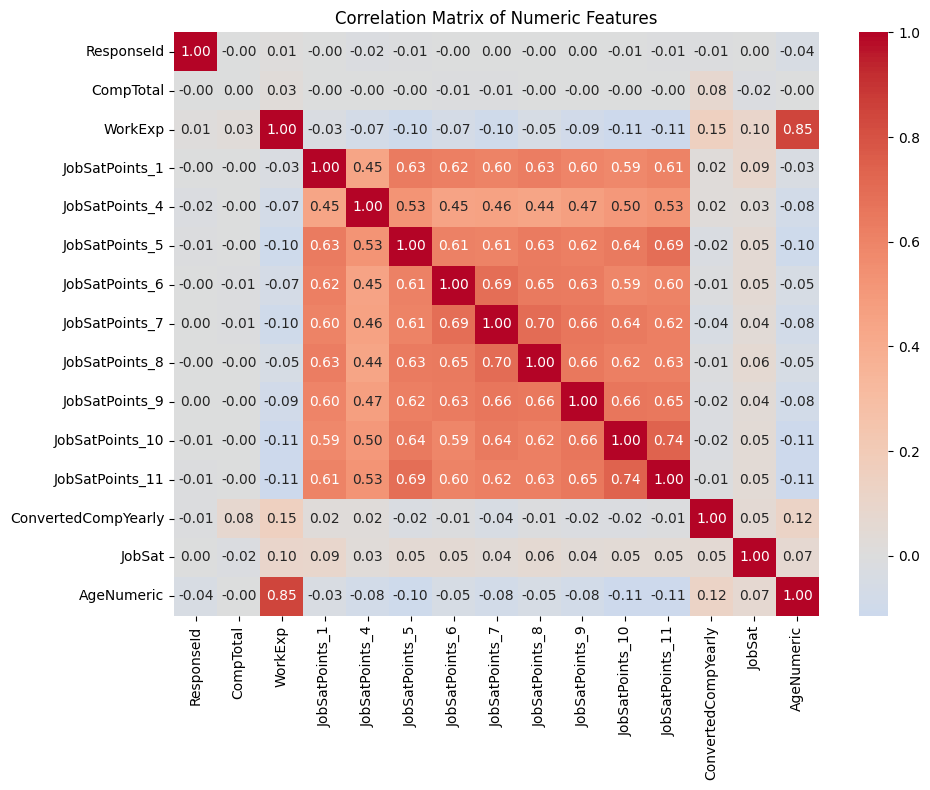

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
